# National Parks Biodiversity

In this notebook, we are going to analyze a dataset about the species in the National Parks Service Species. Throughout this notebook, we will journey through the dataset and try to extract from it as much knowledge as possible.

## About the Project

This project is part of the Data Scientist: Machine Learning Professional Certificate by Codecademy

## Understanding The Dataset

We are given two CSV files
- observations.csv: which holds recorded sightings of different species at several national parks for the past 7 days
- species_info.csv: which contains data about different species and their conservation status

We will start by loading the data and printing the first rows of the two files.

In [1]:
import pandas as pd
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

print(observations.head())
print(species.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

We can now start understanding the dataset.

The observations dataframe contains data about the number of animals of each species for each one of the National Parks. It has the following columns
- `scientific_name`: Species scientific_name
- `park_name`: Name of the park which is one of the National Parks
- `observations`: The number of times the species was observed at the park during the last 7 days

As for the species dataframe, it gives information about animal species that live in the National Parks. It has the following columns
- `scientific_name`: Species scientific name
- `category`: The type of species like mammal, fish, bird, etc.
- `common_names`: A list of common names for the species
- `conservation_status`: The current endangerment status of the species.

## Cleaning and Preparing the Data

I will start by merging the two dataframes

In [2]:
df = pd.merge(observations, species, on='scientific_name')
print(df.head())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  


### Handling Nulls
We will now check which columns have null values

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


The only feature with missing values is conservation_status. There are only 880 observations with non-null conservation_status while the total number of observations is 25632. That is 96.9% of the data have null conservation_status.

The question now is: Are these data values missing?

In [4]:
print(df.conservation_status.unique())

[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


The `conservation_status` doesn't have a 'Not Endangered' value. Therefore, we can understand that species with nan as conservation_status aren't endangered. The fact that 96.9% of the values are null makes sense with our domain knowledge. 

We will rename these values to `Protected` to ease the interaction with dataframe.

In [5]:
df = df.fillna('Protected')
print(df.conservation_status.unique())

['Protected' 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


As for the other columns they might indeed be null without explicitly having pandas null value. For example,  we could have empty strings. This will be clear when we start plotting the data so we will leave it for now.

### Data Types

In [6]:
print(df.dtypes)

scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object


All the data have the correct data types and we will edit nothing here.

## Analysis

### We are planning to invest in protecting species that live in the National Park. Which category should be prioritized?

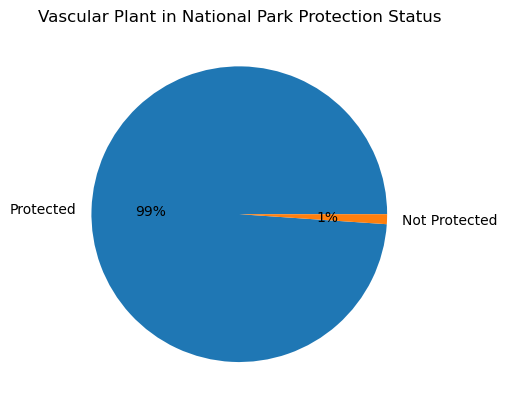

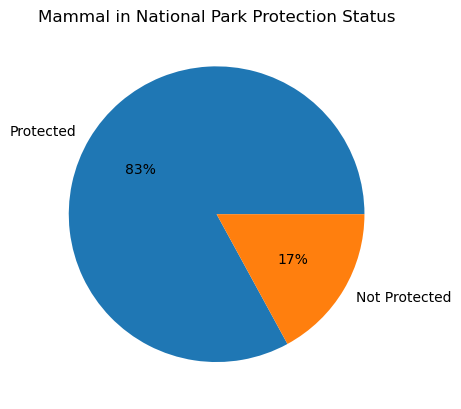

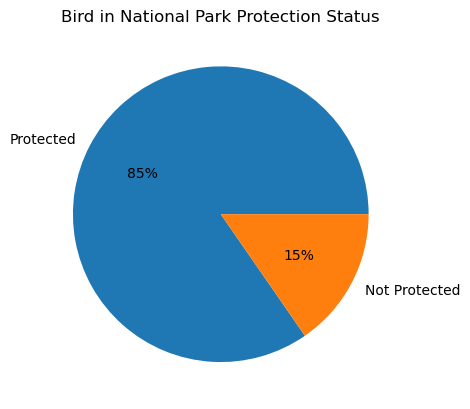

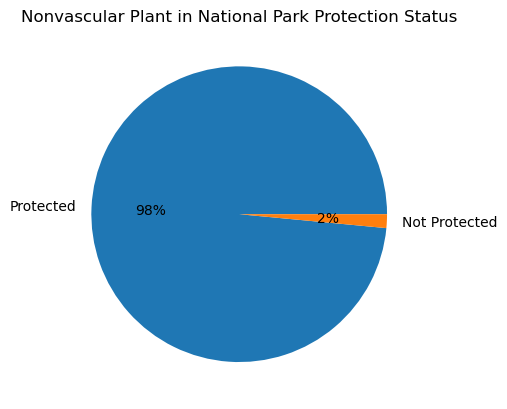

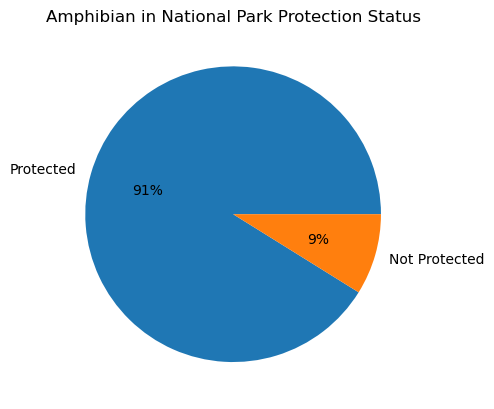

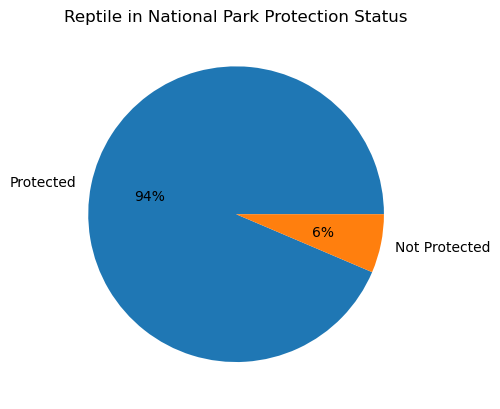

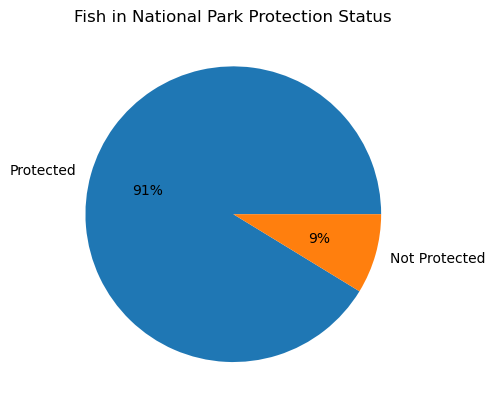

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for category in df.category.unique():
  plt.pie(
    x=[
      df[(df.category==category)&(df.conservation_status=='Protected')].scientific_name.nunique(),
      df[(df.category==category)&(df.conservation_status!='Protected')].scientific_name.nunique()
    ],
    labels=['Protected', 'Not Protected'],
    autopct='%.0f%%'
  )
  plt.title(f'{category} in National Park Protection Status')
  plt.show()
  plt.clf()

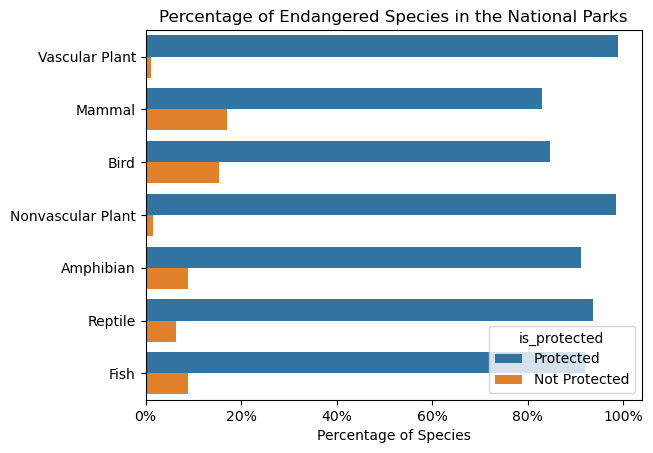

<Figure size 640x480 with 0 Axes>

In [8]:
dict = {'category':[], 'is_protected':[], 'species_percentage':[]}
for category in df.category.unique():
  dict['category'].append(category)
  dict['is_protected'].append('Protected')
  dict['species_percentage'].append(df[(df.conservation_status == 'Protected') & (df.category==category)].scientific_name.nunique()/df[df.category==category].scientific_name.nunique())
  
  dict['category'].append(category)
  dict['is_protected'].append('Not Protected')
  dict['species_percentage'].append(df[(df.conservation_status != 'Protected') & (df.category==category)].scientific_name.nunique()/df[df.category==category].scientific_name.nunique())
  
data = pd.DataFrame(dict)
g = sns.barplot(data=data, x='species_percentage', y='category', hue='is_protected', orient='h')
g.set_xlabel('Percentage of Species')
g.set_ylabel(None)
g.set_xticks([0, .2, .4, .6, .8, 1])
g.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
g.set_title('Percentage of Endangered Species in the National Parks')
plt.show()
plt.clf()

Since they have the largest percentage of unprotected species, mammals should be prioritized followed by birds.

### Which park has observed the largest number of endangered animals and plants in the last week?

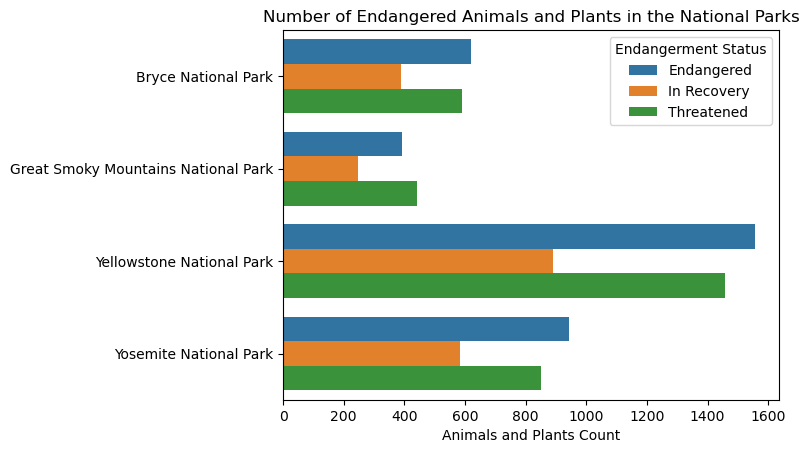

['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']


<Figure size 640x480 with 0 Axes>

In [9]:

data = df.groupby(['park_name', 'conservation_status']).observations.sum().reset_index()
data = data[(data.conservation_status !='Protected') & (data.conservation_status !='Species of Concern')]
g = sns.barplot(data=data, x='observations', y='park_name', hue='conservation_status', orient='h')
g.set_title('Number of Endangered Animals and Plants in the National Parks')
g.set_xlabel('Animals and Plants Count')
g.set_ylabel(None)
g.legend(title="Endangerment Status")
plt.show()
plt.clf()
print(df.category.unique())

Yellowstone Park has observed the largest number of endangered animals and plants.

### What is the most common conservation status for unprotected species?

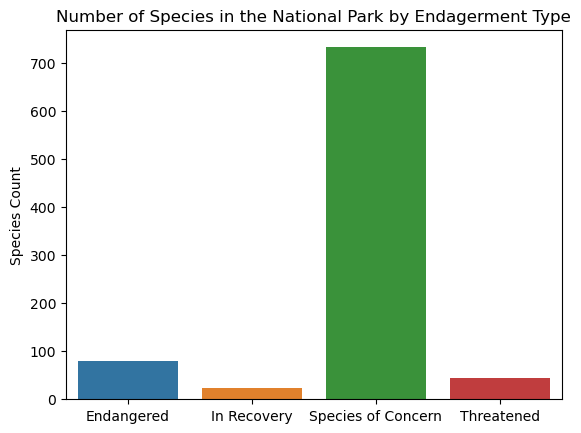

<Figure size 640x480 with 0 Axes>

In [10]:
data = df.groupby(['conservation_status']).scientific_name.count().reset_index()
data = data[(data.conservation_status !='Protected')]
g = sns.barplot(data=data, x='conservation_status', y='scientific_name')
g.set_title('Number of Species in the National Park by Endagerment Type')
g.set_ylabel('Species Count')
g.set_xlabel(None)
plt.show()
plt.clf()


Spices of concern are by far the most common.

### We are going to bring new species to the National Parks. What category should the species be?

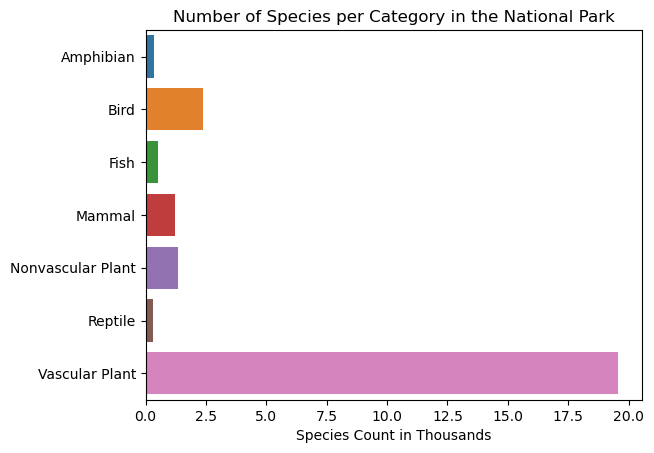

<Figure size 640x480 with 0 Axes>

In [11]:
data = df.groupby(['category']).scientific_name.count().reset_index()
g = sns.barplot(x=data.scientific_name/1000, y=data.category, orient='h')
g.set_title('Number of Species per Category in the National Park')
g.set_xlabel('Species Count in Thousands')
g.set_ylabel(None)
plt.show()
plt.clf()


We should bring reptiles or amphibians as they are the least represented category in the National Parks.

### I want to visit a park that observes the largest number of birds. Which park should I visit?

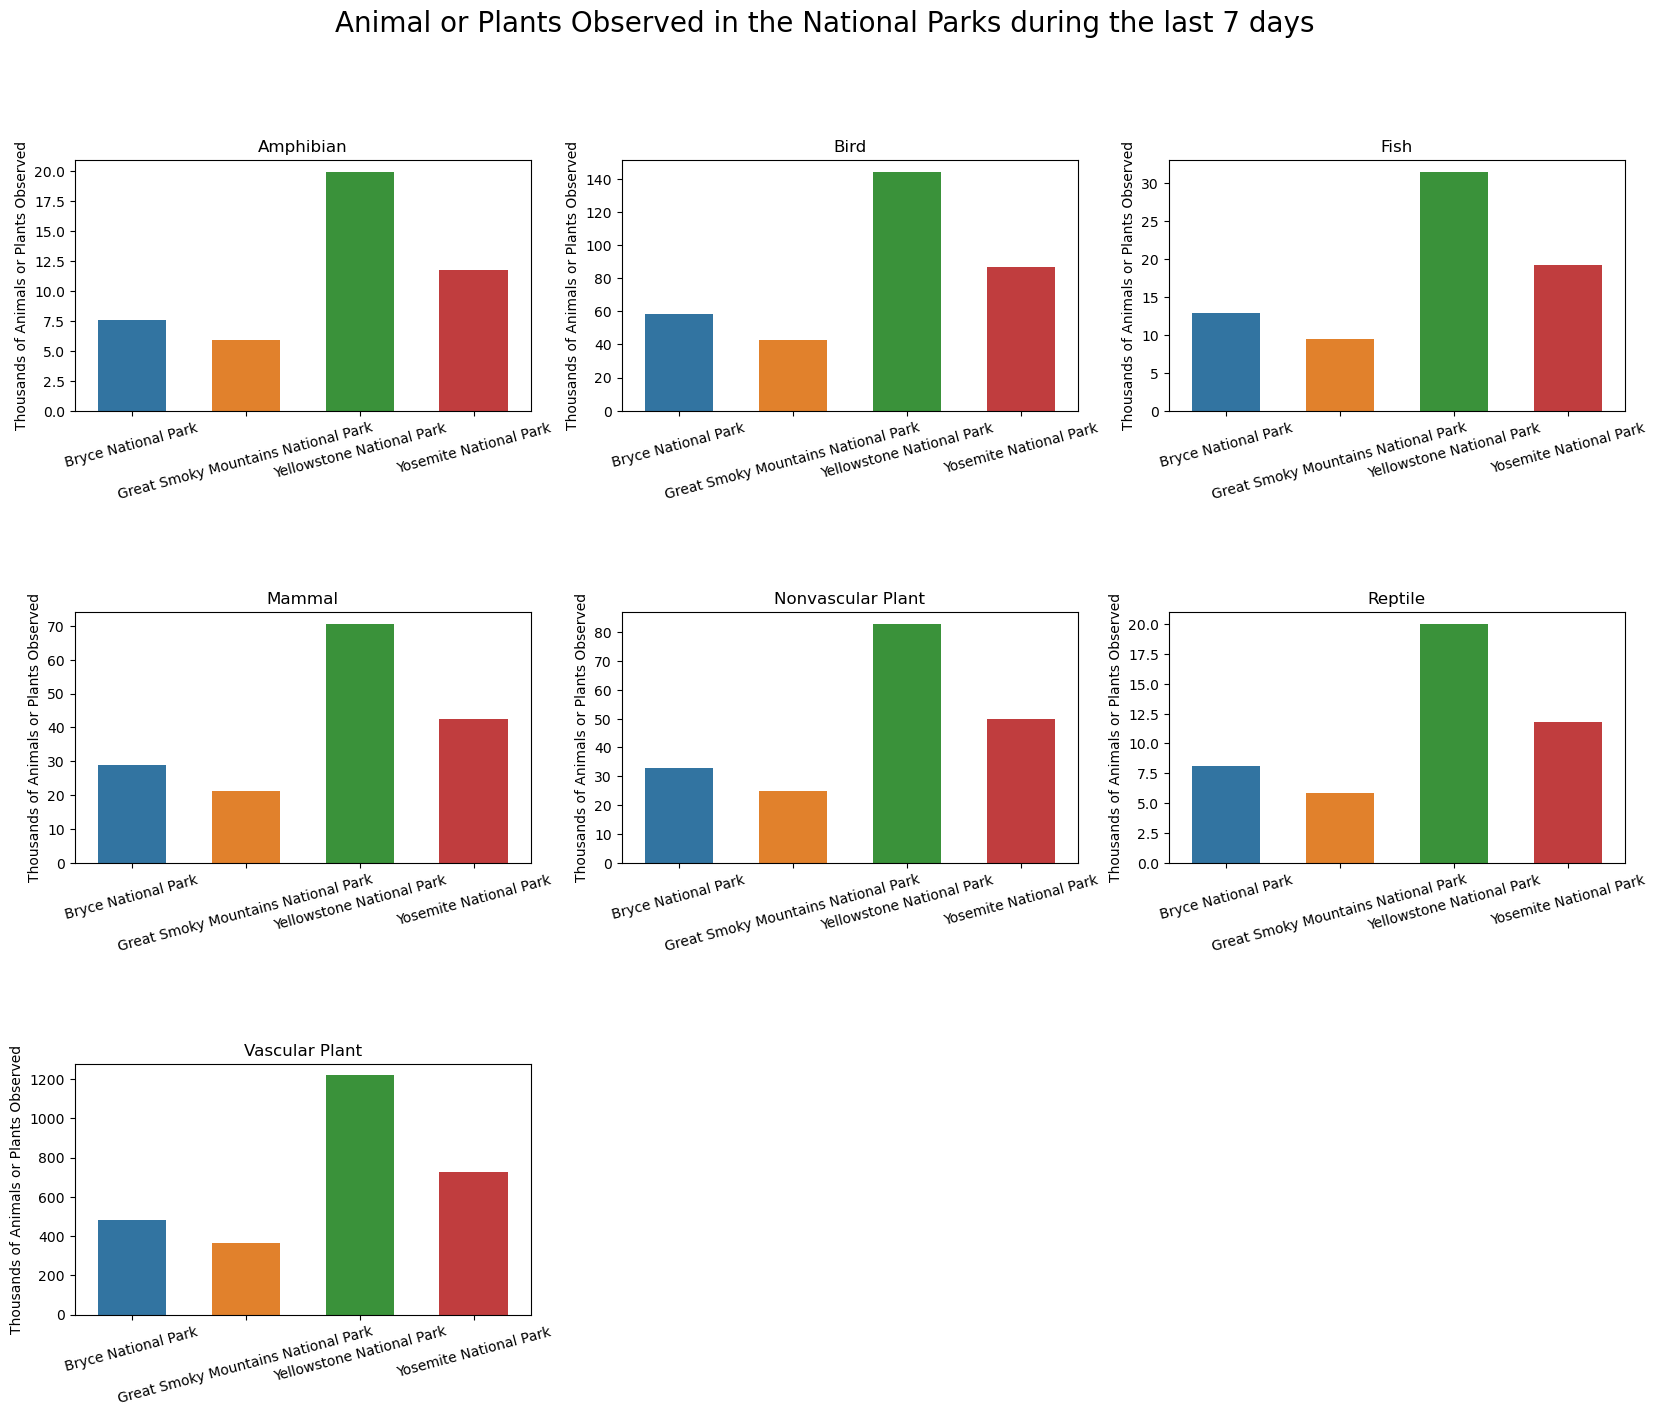

<Figure size 640x480 with 0 Axes>

In [12]:
data = df.groupby(['category', 'park_name']).observations.sum().reset_index()
categories = data.category.unique()
plt.figure(figsize=(20, 15))
fig = plt.gcf()
fig.suptitle("Animal or Plants Observed in the National Parks during the last 7 days", fontsize=20)
for i in range(len(categories)):
  category = categories[i]
  ax = plt.subplot(3, 3, i+1)
  g = sns.barplot(x=data[data.category == category].park_name, y=data[data.category == category].observations/1000, width=0.6)
  g.set_title(category)
  g.set_ylabel('Thousands of Animals or Plants Observed')
  g.set_xlabel(None)
  plt.xticks(rotation=15)
plt.subplots_adjust(hspace=0.8)
plt.show()
plt.clf()

Regardless of the animal or plant category, the Yellowstone National Park observes the largest number of animals and plants 

## Conclusion
- The Yellowstone Park observed the largest amount of animals and plants in the 7 days of data recording
- The vascular plant is the most commonly observed category in the National Parks surpassing any other category with a huge difference
- We should prioritize protecting mammals

## Acknowledgment
I would like to express my sincere gratitude to the Codecademy team for their exceptional course and comprehensive explanations.